# Data Exploration and Prepocessing
This notebook is rather monotonous, but necessary!

In [2]:
# Data Management/Investigation
import pandas as pd
from pandas.api.types import CategoricalDtype # Ordering categories
import numpy as np
import missingno as miss
from datetime import date, timedelta

# Plotting libraries
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from scipy.stats import norm

# Misc
import warnings
warnings.filterwarnings("ignore")

## import greenwords as list
greenwords = open("greenwords.txt", "r")
greenwords = greenwords.readlines()
greenwords = [s.rstrip() for s in greenwords]

# Data

In [70]:
## import data
df = pd.read_csv('../quantifying-greenwashing/data/master_data_companylevel_counts.csv')


##### Describe Numeric Data

In [5]:
df.describe()

,environment_rating,environment_percentage,Sales,Profits,Assets,Market Value,posts_per_year,is_video,is_sponsored,caption,...,video_length_green_diff,likes_green_diff,comments_green_diff,caption_num_words_green_diff,caption_unique_words_green_diff,mention_counts_green_diff,hashtag_counts_green_diff,emoji_counts_green_diff,posts_per_day,captions_per_year
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,...,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,282.000000,282.000000
mean,62.964539,75.113475,371.445780,27.108379,1414.301489,526.868759,153.088652,0.311385,0.002500,152.691489,...,1.796832,-2287.793353,-64.794808,14.784615,10.425156,0.067518,0.260940,0.079514,0.451589,0.996195
std,9.629737,19.636770,550.959247,56.077753,3379.510862,1255.385586,190.906647,0.210574,0.019515,190.798865,...,46.107824,21975.132804,1024.663331,24.222708,15.995247,0.413344,1.466160,0.589570,0.563146,0.017708
min,24.000000,18.000000,6.700000,-85.060000,9.320000,3.660000,2.000000,0.000000,0.000000,2.000000,...,-173.036001,-339077.210000,-14672.987950,-30.803922,-25.088235,-0.786885,-3.941762,-2.764706,0.005900,0.802632
25%,56.000000,60.250000,81.160000,5.005000,166.497500,92.907500,52.000000,0.149901,0.000000,52.000000,...,-6.572825,-376.785714,-10.985232,2.362390,1.948575,-0.085562,-0.245190,-0.091949,0.153392,1.000000
50%,64.000000,81.000000,167.740000,12.513500,389.105000,207.365000,97.000000,0.285714,0.000000,97.000000,...,-1.312304,-36.542052,-1.256553,8.855898,7.210046,-0.008031,0.000000,0.000000,0.286136,1.000000
75%,71.000000,92.000000,444.015000,32.259500,1184.357500,461.280000,181.000000,0.425192,0.000000,181.000000,...,6.105270,20.909132,0.821388,19.972305,14.358097,0.070770,0.514273,0.171371,0.533923,1.000000
max,82.000000,99.000000,5239.640000,572.150000,26199.540000,13590.280000,1618.000000,1.000000,0.266667,1618.000000,...,554.863347,18872.115740,5151.338951,154.625160,102.184615,3.000000,15.578571,5.453125,4.772861,1.000000


## Missing Data

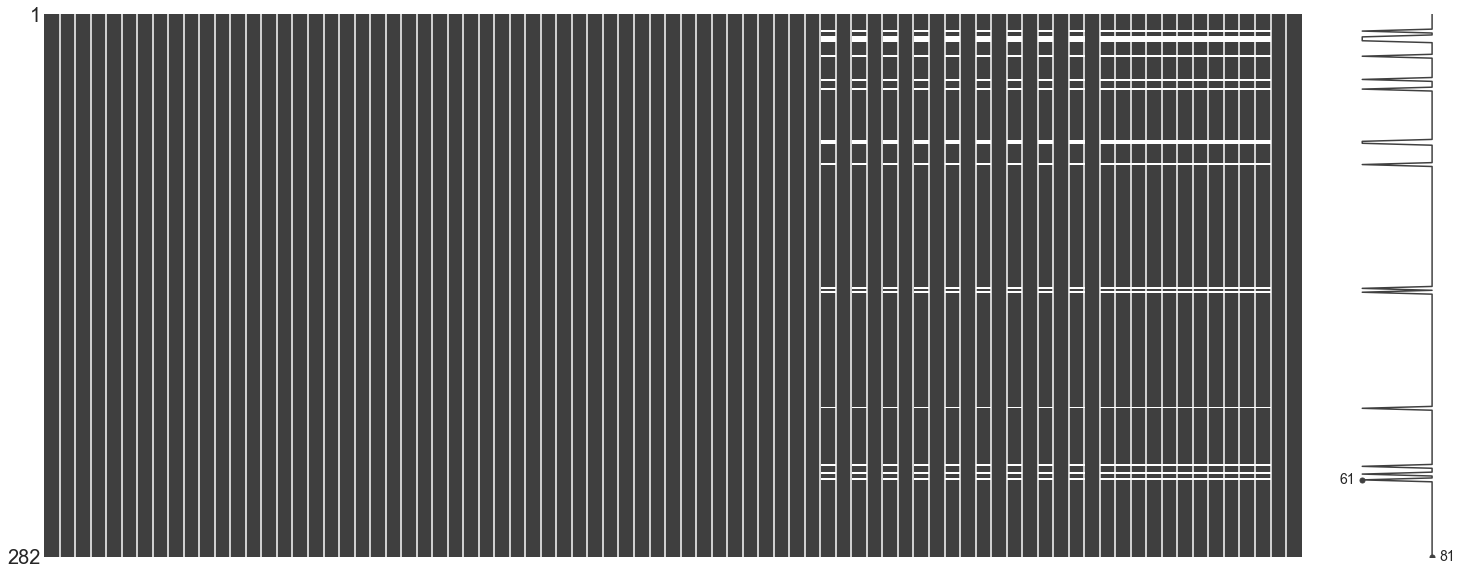

In [31]:
miss.matrix(df) 

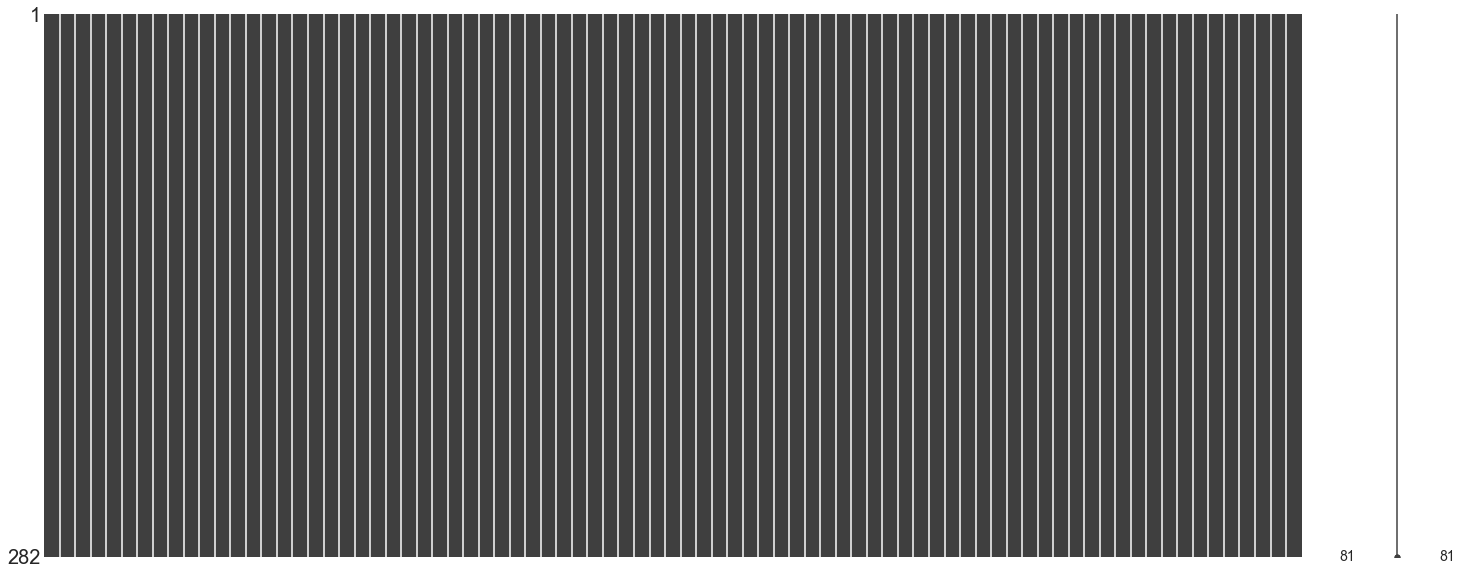

In [32]:
## fill na with zero
df = df.fillna(0)
miss.matrix(df) 

## Dependent Variable

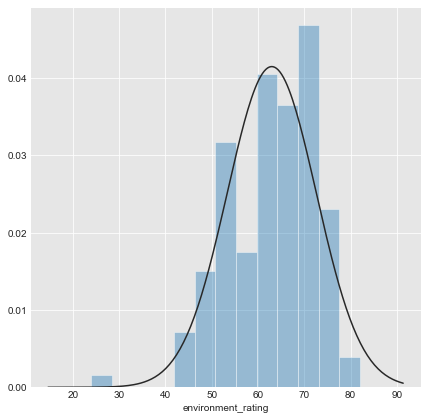

In [33]:
## distribution of environmental rating

fig, ax = plt.subplots(figsize = (7, 7))
ax = sns.distplot(df['environment_rating'], fit=norm, kde=False)

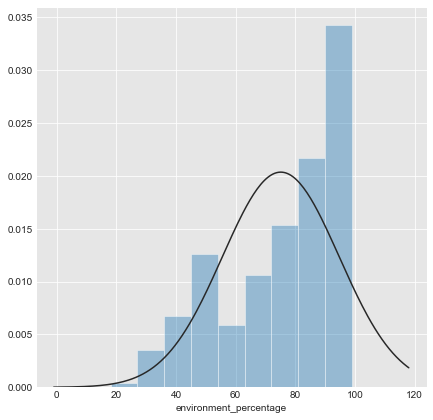

In [34]:
## distribution of environmental percentage

fig, ax = plt.subplots(figsize = (7, 7))
ax = sns.distplot(df['environment_percentage'], fit=norm, kde=False)

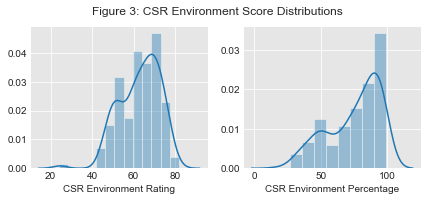

In [35]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
df['CSR Environment Rating'] = df['environment_rating'] 
df['CSR Environment Percentage'] = df['environment_percentage']


fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize = (7,2.7))
sns.distplot(df['CSR Environment Rating'], ax=ax1, label = 'test') 
sns.distplot(df['CSR Environment Percentage'], ax=ax2)
fig.suptitle('Figure 3: CSR Environment Score Distributions ')

plt.gcf().subplots_adjust(bottom=0.15)
#fig = sns.distplot(dt['var'], norm_hist=False, kde=False, bins=3).get_figure()

df['CSR Environment Rating'] = df['environment_rating'] 
#plt.tight_layout()

fig.savefig("../quantifying-greenwashing/presentation/images/CSR-score-dist.png")

##### Testing LN Function

In [36]:
def var_to_ln(df, col):

    df['LN'+col] =  np.log(df[col] + 1)
    original = df[col]
    new_ln = df['LN'+col]
    

    # compare distributions
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize = (10,4))
    sns.distplot(original, ax=ax1) 
    sns.distplot(new_ln, ax=ax2) 
    
    return new_ln

## Company Variables

##### Country vs. Environmental Rating

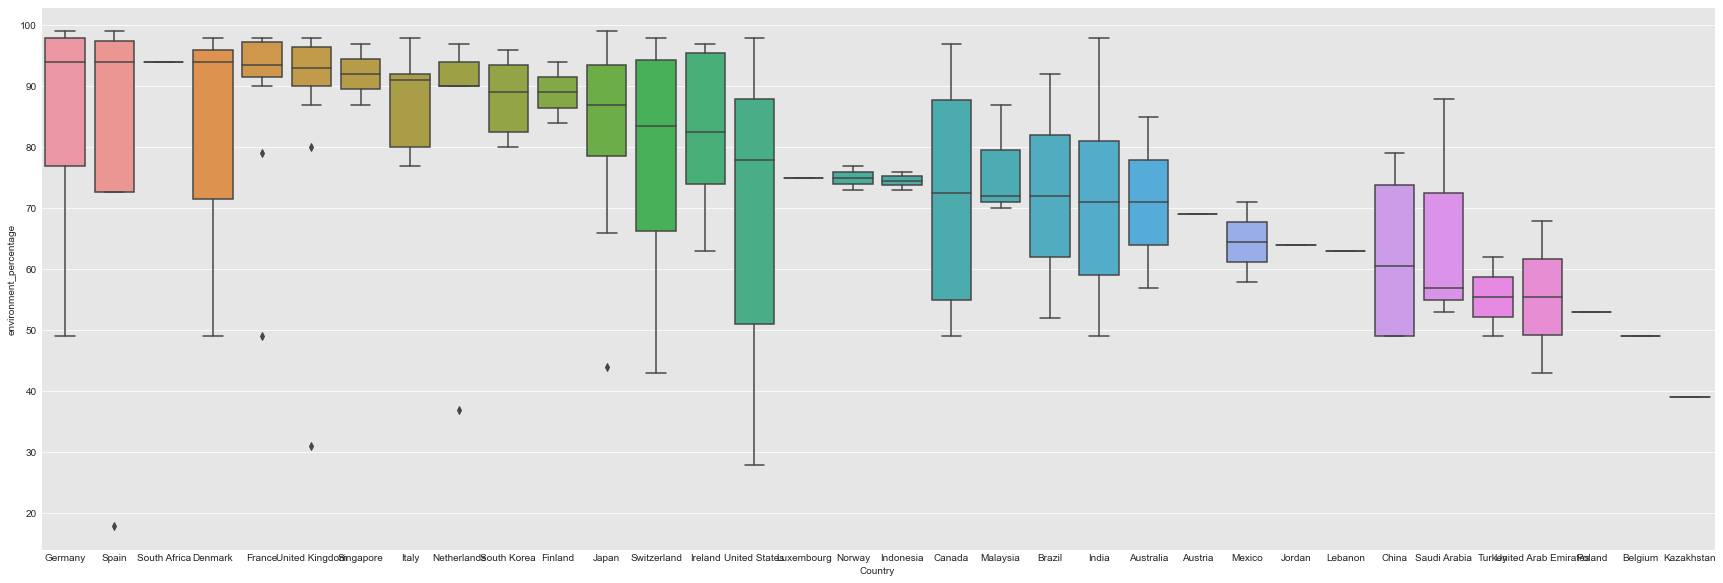

In [37]:
state_order = df.groupby("Country")['environment_percentage'].median().sort_values()[::-1].index

fig, ax = plt.subplots(figsize = (30, 10))
sns.boxplot(x='Country', y='environment_percentage', data=df, order = state_order)

In [38]:
df['Country'].value_counts()

United States           137
Japan                    19
India                    13
France                   12
Germany                  11
United Kingdom           11
Canada                    8
South Korea               7
Ireland                   6
Netherlands               5
Italy                     5
Switzerland               4
China                     4
Spain                     4
Saudi Arabia              3
Denmark                   3
Malaysia                  3
Norway                    2
Turkey                    2
Singapore                 2
Mexico                    2
Finland                   2
South Africa              2
United Arab Emirates      2
Indonesia                 2
Australia                 2
Brazil                    2
Austria                   1
Lebanon                   1
Belgium                   1
Kazakhstan                1
Poland                    1
Jordan                    1
Luxembourg                1
Name: Country, dtype: int64

In [39]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Oceania',
    'AF': 'Africa',
    'EU': 'Europe'
}

## create new columns which clump non US countries by continent
df['Continent'] = [continents[country_alpha2_to_continent_code(country_name_to_country_alpha2(country))] for country in df['Country']]
df['Region'] = np.where(df['Country']=='United States', 'United States', df['Continent'])

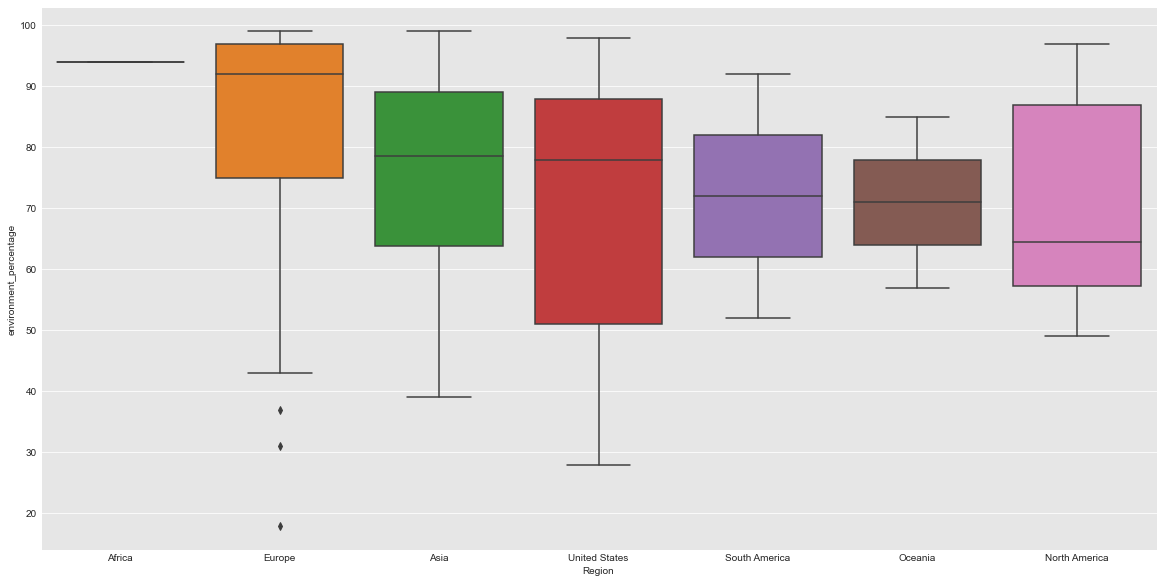

In [40]:
## graph newly defined regions
state_order = df.groupby("Region")['environment_percentage'].median().sort_values()[::-1].index

fig, ax = plt.subplots(figsize = (20, 10))
sns.boxplot(x='Region', y='environment_percentage', data=df, order = state_order)

In [41]:
df['Region'].value_counts()

United States    137
Europe            69
Asia              60
North America     10
Africa             2
South America      2
Oceania            2
Name: Region, dtype: int64

In [42]:
df['united_states'] = 1*(df['Region'] == "United States")
df['europe'] = 1*(df['Region'] == "Europe")
df['asia'] = 1*(df['Region'] == "Asia")
# Everyone else ("other") is the baseline. 

##### Distribution of Sales

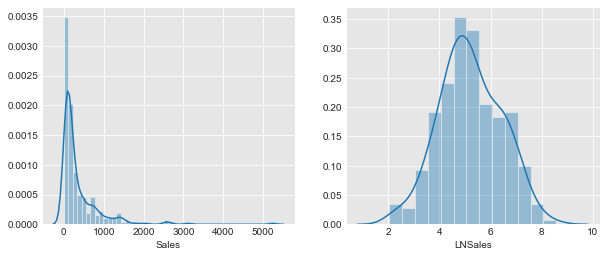

In [43]:
df['ln_Sales'] = var_to_ln(df, 'Sales')

##### Distribution of Profits

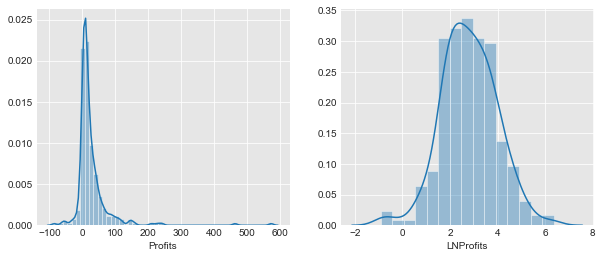

In [44]:
df['ln_profits'] = var_to_ln(df, 'Profits')

##### Distribution of Assets

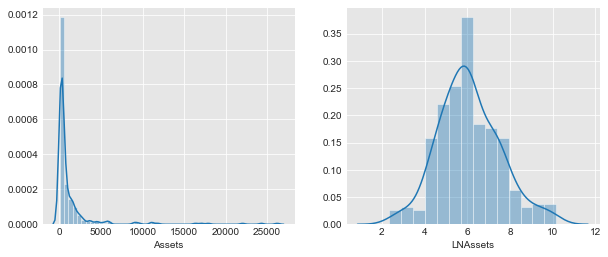

In [45]:
df['ln_assets'] = var_to_ln(df, 'Assets')

##### Distribution of Market Value

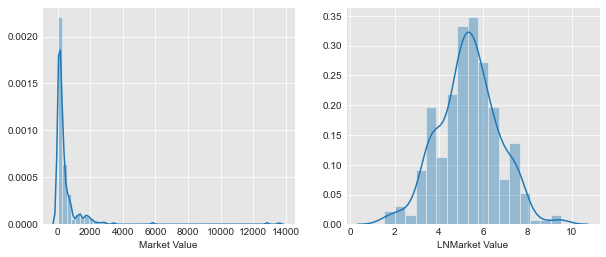

In [46]:
df['ln_marketvalue'] = var_to_ln(df, 'Market Value')

## Instagram Variables

##### Divide Columns into subgroups

In [47]:
instagram_columns = [
    'posts_per_year',
    'posts_per_day',
    'captions_per_year',
    'is_video', 'is_sponsored',
    'likes', 'comments',
    'caption_num_words',
    'caption_unique_words',
    'mention_counts',
    'hashtag_counts',
    'emoji_counts']

### Iteratively Plot

In [48]:
def scatter_plot(cols_list, df, Y, n_rows):
    ## turn list into dataframe
    graphing_df = df[cols_list]
    
    ## remove columns where every value is zero, because those are no fun!
    graphing_df.loc[:, (graphing_df != 0).any(axis=0)]
    
    ## set # of columns based on # of vars
    l = len(cols_list)
    n_cols = round((l/n_rows),0) + 1
    
    ## set size of figure
    fig_length = n_cols*4

    
    fig, ax = plt.subplots(figsize = (12, fig_length))
    ## plot
    for i, col in enumerate(graphing_df.columns):
        plt.subplot(n_cols,n_rows, i+1)
        feature = graphing_df.columns.values[i]
        sns.scatterplot(x=graphing_df[feature],y=Y,ax=plt.gca())
        ftitle = feature.split(',')[0].replace("('", "").replace("'", "")
        plt.title(ftitle,fontsize=18)
        #plt.title(col)
        #plt.axis('off')
    plt.tight_layout()

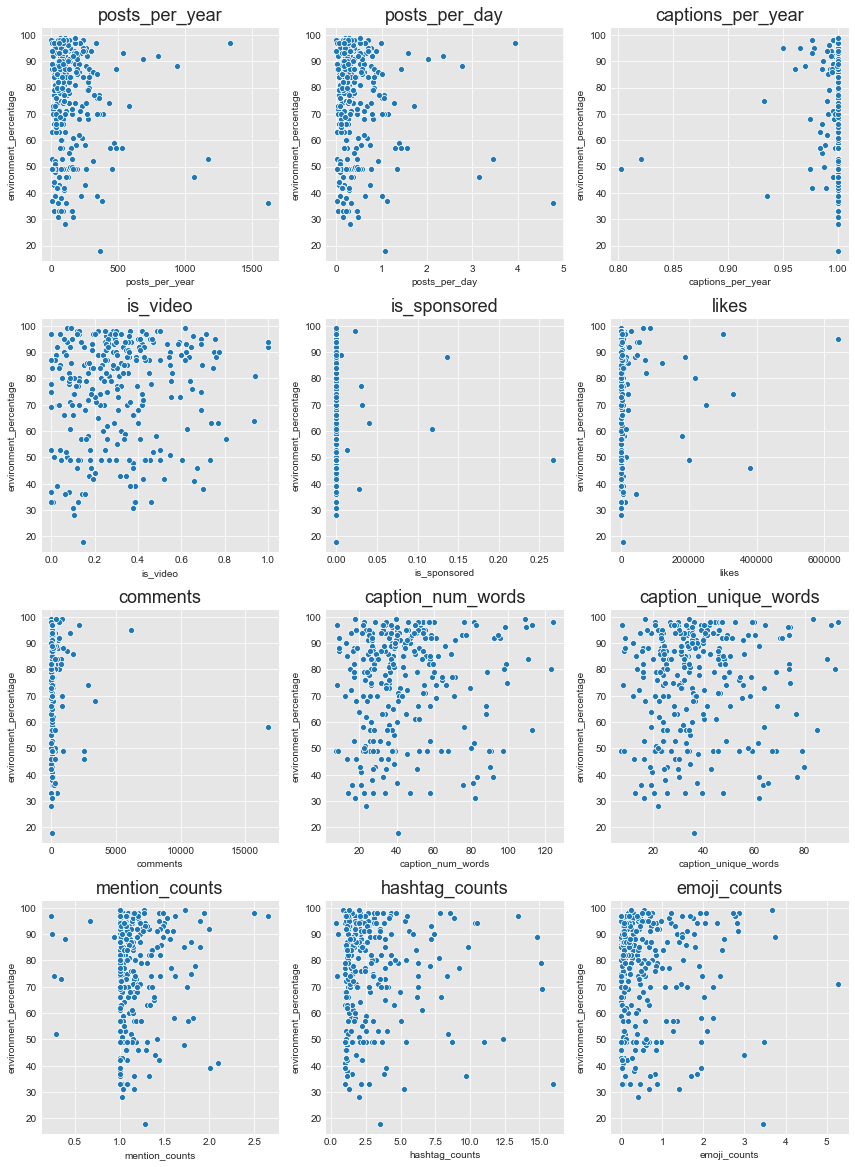

In [49]:
## plot average instagram variables

scatter_plot(instagram_columns, df, df['environment_percentage'], 3)

##### Adjust instagram variables

##### Avg Posts per year

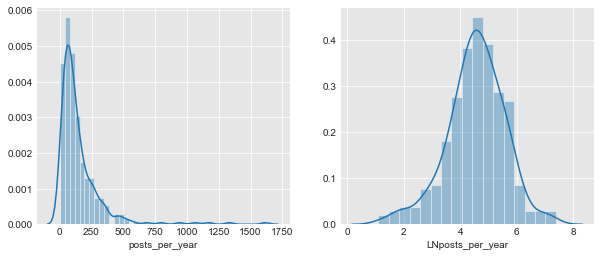

In [50]:
df['ln_posts_per_year'] = var_to_ln(df, 'posts_per_year')

##### Avg Post per day

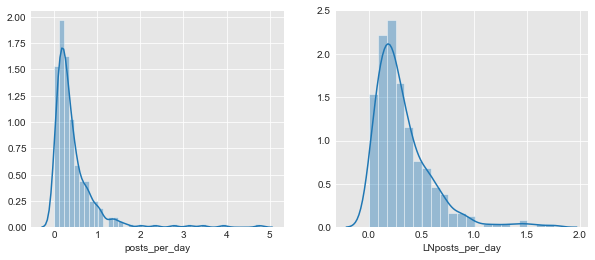

In [51]:
df['ln_posts_per_day'] = var_to_ln(df, 'posts_per_day')

##### Avg Captions per year

In [52]:
## 0 = not all posts have captions
## 1 = all posts have captions

bins = [0,1, 2]
labels = [0, 1]
df['bin_captions_per_year'] = pd.cut(df['captions_per_year'], bins=bins, right=False, labels = labels)
df['bin_captions_per_year'].value_counts()

1    234
0     48
Name: bin_captions_per_year, dtype: int64

##### Avg sponsored content 

In [53]:
## 0 = no sponsored posts
## 1 = some sponsored posts

bins = [-1,0.00000000000000001, 1]
labels = [0, 1]
df['bin_is_sponsored'] = pd.cut(df['is_sponsored'], bins=bins, right=False, labels = labels)
df['bin_is_sponsored'].value_counts()

0    271
1     11
Name: bin_is_sponsored, dtype: int64

##### Avg likes

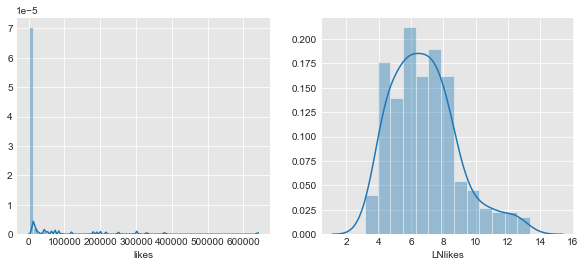

In [54]:
df['ln_likes'] = var_to_ln(df, 'likes')

##### Avg comments

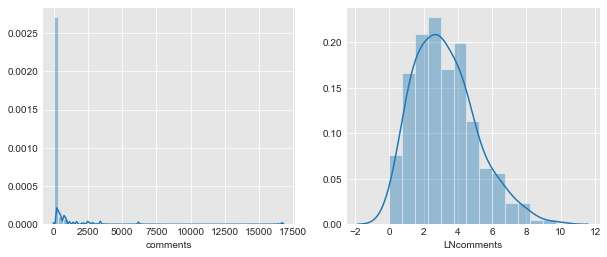

In [55]:
df['ln_comments'] = var_to_ln(df, 'comments')

##### Avg number of mentions

In [56]:
## 0 = less than 1 mention per post
## 1 = 1 mention per post
## 2 = more than one mention per post

bins = [-1,0.9999,1.111111, 5]
labels = [0, 1, 2]
df['bin_mention_counts'] = pd.cut(df['mention_counts'], bins=bins, right=False, labels = labels)
df['bin_mention_counts'].value_counts()

1    150
2    124
0      8
Name: bin_mention_counts, dtype: int64

##### Avg hashtag counts

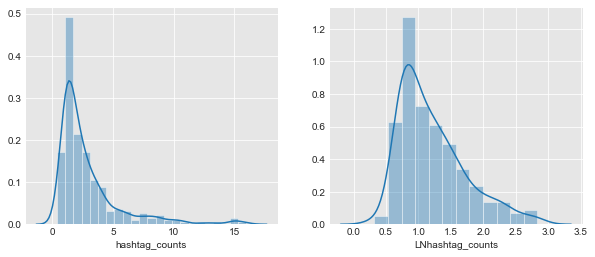

In [57]:
df['ln_hashtag_counts'] = var_to_ln(df, 'hashtag_counts')

##### Avg Emoji Counts

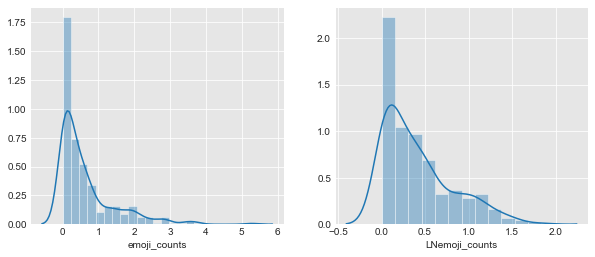

In [58]:
df['ln_emoji_counts'] = var_to_ln(df, 'emoji_counts')

## Green Words Variables

In [59]:
## add column for sum of all green words per company

df['total_green_mentions'] = df["mentions_eco"] + df["mentions_eco-friendly"] + df["mentions_green"] + df["mentions_organic"] +df["mentions_clean"] + df["mentions_sustainable"] + df["mentions_sustainability"] + df["mentions_carbon"] + df["mentions_emissions"] 
df['total_green_hashtags'] = df["hashtags_eco"] + df["hashtags_eco-friendly"] + df["hashtags_green"] + df["hashtags_organic"] +df["hashtags_clean"] + df["hashtags_sustainable"] + df["hashtags_sustainability"] + df["hashtags_carbon"] + df["hashtags_emissions"]
df['total_green_caption'] = df["caption_eco"] + df["caption_eco-friendly"] + df["caption_green"] + df["caption_organic"] +df["caption_clean"] + df["caption_sustainable"] + df["caption_sustainability"] + df["caption_carbon"] + df["caption_emissions"]

df['total_green'] = df['total_green_mentions'] + df['total_green_hashtags'] + df['total_green_caption']

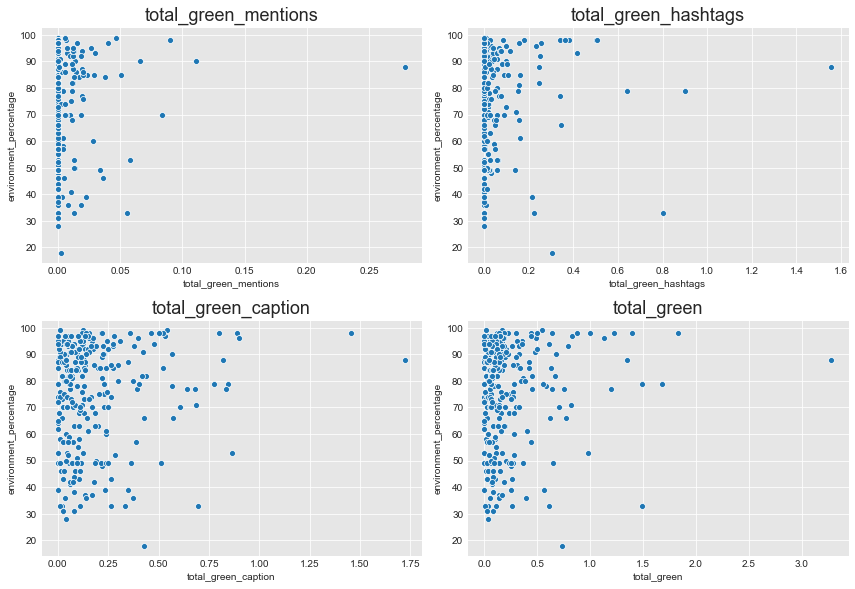

In [60]:
## plot all greenwords
greenCols = ['total_green_mentions', 'total_green_hashtags', 'total_green_caption', 'total_green']
scatter_plot(greenCols, df, df['environment_percentage'], 2)

## Difference in Green instagram variables

In [61]:
diffCols = [col for col in df.columns if 'diff' in col]

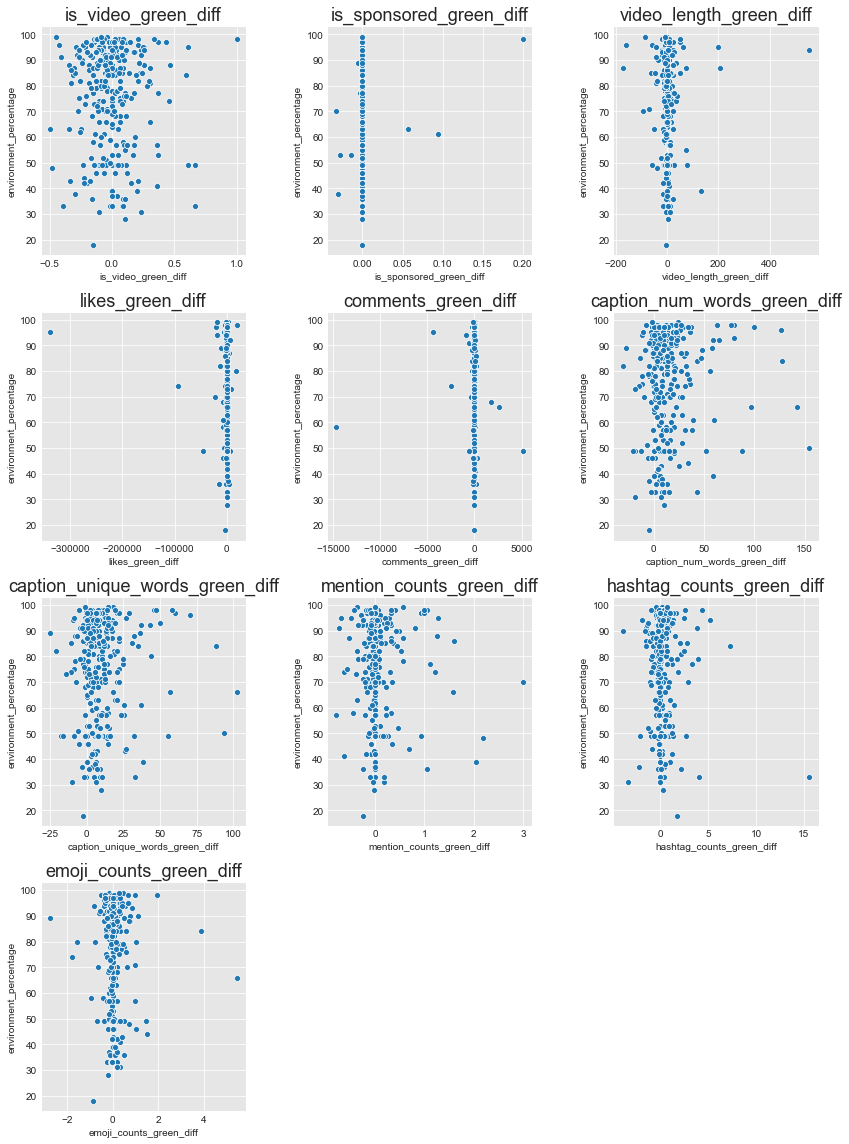

In [62]:
scatter_plot(diffCols, df, df['environment_percentage'], 3)

##### Bar plot differences

In [63]:
def bar_graph_prep(colName):
    '''
    Function: groups, aggregates, and renames columns for green difference bar graphs
    '''
    tmpDF = df[[colName+"_1", colName+"_0"]]
    tmpDF = pd.melt(tmpDF, value_vars=[colName+"_1", colName+"_0"]).groupby('variable').sum().reset_index()
    yn_map = {colName+"_0": 'Non-green Post', colName+"_1": 'Green-Post'}
    tmpDF['variable'] = tmpDF['variable'].map(yn_map)
    return tmpDF
 
    


In [64]:
video_length = bar_graph_prep("video_length")    
is_video = bar_graph_prep("is_video")
caption_num_word = bar_graph_prep("caption_num_words") 
hashtag_counts = bar_graph_prep("hashtag_counts")

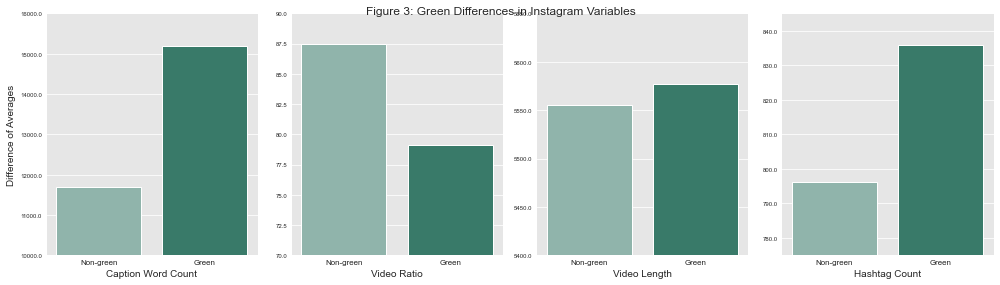

In [66]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

pal = ["#8ABAAE","#2E856E"]
#"#2E856E","#006A4E"]
#pal = sns.color_palette("Greens_d")

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, sharey=False, figsize = (14,4))
sns.barplot(x="variable", y="value", data=caption_num_word, capsize=.2, ax=ax1, palette = pal)
ax1.set(ylim=(10000, 16000))
sns.barplot(x="variable", y="value", data=is_video, capsize=.2, ax=ax2, palette = pal)
ax2.set(ylim=(70, 90))
sns.barplot(x="variable", y="value", data=video_length, capsize=.2, ax=ax3, palette = pal)
ax3.set(ylim=(5400, 5650))
sns.barplot(x="variable", y="value", data=hashtag_counts, capsize=.2, ax=ax4, palette = pal)
ax4.set(ylim=(775, 845))


ax1.set_xlabel('Caption Word Count')
ax1.set_ylabel('Difference of Averages')


ax2.set_xlabel('Video Ratio')
ax2.set_ylabel(None)


ax3.set_xlabel('Video Length')
ax3.set_ylabel(None)


ax4.set_xlabel('Hashtag Count')
ax4.set_ylabel(None)


fig.suptitle('Figure 3: Green Differences in Instagram Variables', fontsize=12)

plt.savefig("../quantifying-greenwashing/presentation/images/differences.png")


ax1.set_yticklabels(ax1.get_yticks(), size=6)
ax2.set_yticklabels(ax2.get_yticks(), size=6)
ax3.set_yticklabels(ax3.get_yticks(), size=6)
ax4.set_yticklabels(ax4.get_yticks(), size=6)

ax1.set_xticklabels(labels = ['Non-green', 'Green'], size = 8)
ax2.set_xticklabels(labels = ['Non-green', 'Green'], size = 8)
ax3.set_xticklabels(labels = ['Non-green', 'Green'], size = 8)
ax4.set_xticklabels(labels = ['Non-green', 'Green'], size = 8)
plt.tight_layout()

#plt.savefig("../quantifying-greenwashing/presentation/images/differences.png")

## New Dataframe for Modeling

In [ ]:
selected_columns = [
    "company",
    "environment_rating",
    "environment_percentage",
    "Region",
    "united_states",
    "europe",
    "asia",
    "ln_Sales",
    "Profits",
    "ln_assets",
    "ln_marketvalue",
    "ln_posts_per_year",
    "ln_posts_per_day",
    "has_location",
    "is_video",
    "bin_captions_per_year",
    "bin_is_sponsored",
    "ln_likes",
    "ln_comments",
    "bin_mention_counts",
    "ln_hashtag_counts",
    "ln_emoji_counts",
    "total_green_mentions",
    "total_green_hashtags",
    "total_green_caption",
    "total_green",
    "is_video_green_diff",
    "is_sponsored_green_diff",
    "video_length_green_diff",
    "likes_green_diff",
    "comments_green_diff",
    "caption_num_words_green_diff",
    "caption_unique_words_green_diff",
    "mention_counts_green_diff",
    "hashtag_counts_green_diff",
    "emoji_counts_green_diff"
    
]

In [ ]:
## create new dataframe

output_df = df[selected_columns]

In [ ]:
## export as csv
output_df.to_csv("greenwashing_data.csv", index=False, encoding='utf-8-sig')